# CRISP-DM: Entendimento dos Dados


## SRO (Classificação)


In [20]:
#!wget https://github.com/danillogontijo/ifg/raw/main/datasets/soluti/SRO.csv

## Imports


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [39]:
# Exibir gráficos dentro do Jupyter Notebook
%matplotlib inline

# Definir tamanho padrão para os gráficos
rcParams['figure.figsize'] = 17, 4

## Carregar Dataset


In [72]:
sro = pd.read_csv('SRO.csv')
sisar = pd.read_csv('SISAR.csv')

dataset = pd.merge(sro, sisar, how='left', on=['solicitacao_certificado'])
# deixar apenas a AR Soluti
dataset = dataset.query("AR == 'AR Soluti'")
dataset.sample(3)


,solicitacao_certificado,midia_certificado,data_suporte,motivo_suporte,acesso_remoto_suporte,cpf_x,cnpj_x,AR,cpf_y,cnpj_y,...,situacao,nome_situacao,agr_atendimento,data_solicitacao_certificado,data_aprovacao_certificado,data_emissao_certificado,produto,dn_cliente,cidade_atendimento,uf_atendimento
89526,11111710096CEBDD,Token,2018-09-03,DUVIDA NA BAIXA DO DRIVER,Sim,67985cfff4540292cceae0e3310f9d29,NaN,AR Soluti,67985cfff4540292cceae0e3310f9d29,NaN,...,4,Emitida,IGOR RAFAEL ALVES SOUSA,2017-10-09 17:43:26,2017-10-09 18:02:14,2017-10-09 18:03:53,ACS PF A3,1984-11-24,Goiânia,GO
166104,11DE1911254C4AA7,Nenhum,2020-02-10,RETORNO PARA OCORRÊNCIAS EM ANDAMENTO,Sim,5a0f8ac7624684cf75ce43e3ace50e96,NaN,AR Soluti,5a0f8ac7624684cf75ce43e3ace50e96,NaN,...,4,Emitida,AMANDA RODRIGUES DE LIMA,2019-11-25 12:20:24,2019-11-25 16:39:04,2019-11-28 11:58:12,ACS Bird ID PF A3 5 ANOS - 5000,1981-10-20,Goiânia,GO
207350,11DE20091458A069,Nenhum,2020-09-18,BIRD ID- DUVIDA NA UTILIZAÇÃO,Sim,794e2b03224c857f4a6af760c0f8b427,NaN,AR Soluti,794e2b03224c857f4a6af760c0f8b427,NaN,...,4,Emitida,JASMINIE RIBEIRO DOS ANJOS COSTA,2020-09-14 14:18:16,2020-09-14 14:26:48,2020-09-18 11:16:17,ACS Bird ID PF A3 5 ANOS V5 - 5,1986-03-08,Aracaju,SE


In [73]:
dataset.drop(['dn_cliente','situacao','agr_atendimento','cpf_y', 'cnpj_y'], axis=1, inplace=True)
dataset.rename(columns={'cpf_x': 'cpf', 'cnpj_x': 'cnpj'},inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167204 entries, 0 to 289249
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   solicitacao_certificado       167204 non-null  object
 1   midia_certificado             167204 non-null  object
 2   data_suporte                  167204 non-null  object
 3   motivo_suporte                167204 non-null  object
 4   acesso_remoto_suporte         167204 non-null  object
 5   cpf                           83230 non-null   object
 6   cnpj                          83977 non-null   object
 7   AR                            167204 non-null  object
 8   nome_origem                   167204 non-null  object
 9   nome_situacao                 165138 non-null  object
 10  data_solicitacao_certificado  167204 non-null  object
 11  data_aprovacao_certificado    164982 non-null  object
 12  data_emissao_certificado      160525 non-null  object
 13 

In [74]:
# [0] = Quantidade de instâncias
# [1] = Quantidade de atributos
print("O dataset contém ", dataset.shape[0], "instâncias e ", dataset.shape[1], " atributos.")

O dataset contém  167204 instâncias e  16  atributos.


In [75]:
dataset.describe()

,solicitacao_certificado,midia_certificado,data_suporte,motivo_suporte,acesso_remoto_suporte,cpf,cnpj,AR,nome_origem,nome_situacao,data_solicitacao_certificado,data_aprovacao_certificado,data_emissao_certificado,produto,cidade_atendimento,uf_atendimento
count,167204,167204,167204,167204,167204,83230,83977,167204,167204,165138,167204,164982,160525,167204,167204,167204
unique,101090,4,1449,187,2,43795,47049,1,4,4,100952,99547,96492,89,641,27
top,111117082158140B,Nenhum,2018-01-29,DUVIDA NA BAIXA DO CERTIFICADO DIGITAL,Sim,1f3061b4ff126b2b40df5d93249a8e05,be10358225c6bc8e6e53f6ef2053ded6,AR Soluti,Interna,Emitida,2017-08-21 14:10:20,2017-08-21 14:36:03,2017-08-21 15:12:30,ACS PJ A1,Goiânia,GO
freq,43,90355,282,21751,113029,43,32,167204,142391,158634,43,43,43,39248,70269,78985


### Verificar presença de valores nulos


In [76]:
# Quantidade absoluta
totalNulos = (dataset.isnull()).sum()
totalNulos

solicitacao_certificado             0
midia_certificado                   0
data_suporte                        0
motivo_suporte                      0
acesso_remoto_suporte               0
cpf                             83974
cnpj                            83227
AR                                  0
nome_origem                         0
nome_situacao                    2066
data_solicitacao_certificado        0
data_aprovacao_certificado       2222
data_emissao_certificado         6679
produto                             0
cidade_atendimento                  0
uf_atendimento                      0
dtype: int64

In [77]:

dataset['data_suporte']= pd.to_datetime(dataset['data_suporte'])
dataset['data_suporte'] = dataset['data_suporte'].astype('int64') // 10**9


# dataset['solicitacao_certificado'].astype(str)

/var/folders/k9/y3lclsf94w13thblk7gn18yh0000gn/T/ipykernel_3806/1077074205.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  dataset['data_suporte'] = dataset['data_suporte'].astype('int64') // 10**9


In [78]:
datas = ['data_solicitacao_certificado', 'data_aprovacao_certificado', 'data_emissao_certificado']
for data in datas:
    dataset[data] = pd.to_datetime(dataset[data], format="%Y-%m-%d %H:%M:%S")
    dataset[data] = dataset[data].astype('int64') // 10**9

/var/folders/k9/y3lclsf94w13thblk7gn18yh0000gn/T/ipykernel_3806/508576116.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  dataset[data] = dataset[data].astype('int64') // 10**9


### Separar atributos numéricos e categóricos

In [79]:
# Percentual
percentualNulos = (totalNulos / len(dataset)) * 100
percentualNulos

solicitacao_certificado          0.000000
midia_certificado                0.000000
data_suporte                     0.000000
motivo_suporte                   0.000000
acesso_remoto_suporte            0.000000
cpf                             50.222483
cnpj                            49.775723
AR                               0.000000
nome_origem                      0.000000
nome_situacao                    1.235616
data_solicitacao_certificado     0.000000
data_aprovacao_certificado       1.328916
data_emissao_certificado         3.994522
produto                          0.000000
cidade_atendimento               0.000000
uf_atendimento                   0.000000
dtype: float64

In [80]:
categoricos = dataset[['midia_certificado', 'motivo_suporte', 'acesso_remoto_suporte','AR','nome_origem','nome_situacao','produto', 'cidade_atendimento', 'uf_atendimento']].columns #(dataset.select_dtypes(include=['object'])).columns
categoricos

Index(['midia_certificado', 'motivo_suporte', 'acesso_remoto_suporte', 'AR',
       'nome_origem', 'nome_situacao', 'produto', 'cidade_atendimento',
       'uf_atendimento'],
      dtype='object')

### Visualizar distribuição dos dados (atributos categóricos)

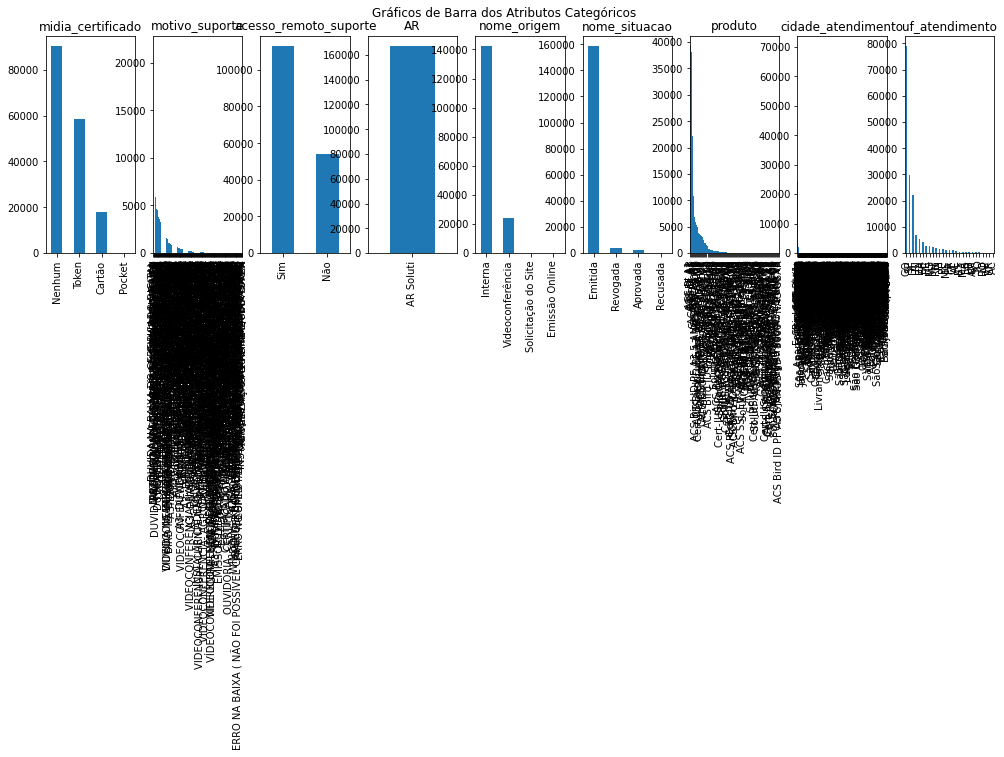

In [81]:
fig, ax = plt.subplots(ncols=len(categoricos), nrows=1)
plt.suptitle("Gráficos de Barra dos Atributos Categóricos")

# Gráfico para cada atributo categórico
for i in range(0, len(categoricos)):
    feature = categoricos[i]
    ax[i].set_title(feature)
    dataset[feature].value_counts().plot(kind='bar', ax=ax[i])

## Tipos de Motivos do Suporte

In [82]:
dataset.groupby(['motivo_suporte']).count()


,solicitacao_certificado,midia_certificado,data_suporte,acesso_remoto_suporte,cpf,cnpj,AR,nome_origem,nome_situacao,data_solicitacao_certificado,data_aprovacao_certificado,data_emissao_certificado,produto,cidade_atendimento,uf_atendimento
motivo_suporte,,,,,,,,,,,,,,,
A1- ACOMPANHAMENTO DE CHAMADO,223,223,223,223,61,162,223,223,217,223,223,223,223,223,223
A1- ALTERAÇÃO DA SENHA,585,585,585,585,172,413,585,585,584,585,585,585,585,585,585
A1- DUVIDA NA BAIXA,9429,9429,9429,9429,2341,7088,9429,9429,9284,9429,9429,9429,9429,9429,9429
A1- DUVIDA NA EXPORTAÇÃO,383,383,383,383,105,278,383,383,382,383,383,383,383,383,383
A1- DUVIDA NA UTILIZAÇÃO,2174,2174,2174,2174,820,1354,2174,2174,2166,2174,2174,2174,2174,2174,2174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIDEOCONFERÊNCIA- CLIENTE NÃO APTO,47,47,47,47,26,21,47,47,28,47,47,47,47,47,47
VÍDEOCONFERÊNCIA- CLIENTE COM ERRO PARA AGENDAR,28,28,28,28,17,11,28,28,22,28,28,28,28,28,28
VÍDEOCONFERÊNCIA- CLIENTE COM ERRO PARA ANEXAR DOCUMENTOS,34,34,34,34,20,14,34,34,27,34,34,34,34,34,34


In [64]:
# fazer um bkp para facilitar rodar os dados daqui para frente
dataset_backup = dataset

Existem 188 tipos diferentes de motivos

# CRISP-DM: Preparação dos Dados

## Imports

In [83]:
from sklearn.model_selection import train_test_split

## Descartar identificador

In [84]:
dataset.drop(['solicitacao_certificado'], axis=1, inplace=True)
#dataset.head(3)

## Preparar os dados
### Usar técnica one_hot_columns

In [85]:

one_hot_columns = ['midia_certificado','AR','nome_origem','nome_situacao','produto', 'cidade_atendimento', 'uf_atendimento']
dataset_dumies = pd.get_dummies(data=dataset, columns = one_hot_columns)

# Acesso Remoto Binário 1-Sim e 0-Não
dataset_dumies['acesso_remoto_suporte'] = dataset_dumies['acesso_remoto_suporte'].map({'Sim': 1, 'Não': 0})


dataset = dataset_dumies

# tratar cpf_ cpnj

for col in dataset[['cpf','cnpj']].columns:
    dataset[col] = np.where(dataset[col].isnull(), 0, 1)
    
dataset.drop(['cpf'], axis =1, inplace=True)

dataset

,data_suporte,motivo_suporte,acesso_remoto_suporte,cnpj,data_solicitacao_certificado,data_aprovacao_certificado,data_emissao_certificado,midia_certificado_Cartão,midia_certificado_Nenhum,midia_certificado_Pocket,...,uf_atendimento_PR,uf_atendimento_RJ,uf_atendimento_RN,uf_atendimento_RO,uf_atendimento_RR,uf_atendimento_RS,uf_atendimento_SC,uf_atendimento_SE,uf_atendimento_SP,uf_atendimento_TO
0,1483660800,TESTAR CERTIFICADO ( E-CAC / CONECTIVIDADE ),0,1,1483712283,1483715572,1483715863,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1483660800,DUVIDA NA BAIXA DO CERTIFICADO DIGITAL,1,1,1483691628,1483693878,1483723741,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1483660800,DUVIDA NA INSTALAÇÃO DO CERTIFICADO DIGITAL (A1),1,1,1483691628,1483693878,1483723741,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1483660800,DUVIDA NA BAIXA DO DRIVER,0,1,1483704011,1483705101,1483705163,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1483660800,DUVIDAS NA INSTALAÇÃO DO DRIVER DO TOKEN,0,1,1483704011,1483705101,1483705163,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289245,1634688000,DLL- IMPORTAÇÃO NO FIREFOX,1,0,1564422947,1564423734,1564423915,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289246,1634688000,A3- DUVIDA NA INSTALAÇÃO DO DRIVER (EPASS2003),1,0,1584609456,1584957365,1591018962,0,0,0,...,0,0,0,0,0,0,0,0,1,0
289247,1634688000,BIRD ID- RECUPERAÇÃO DE SENHA,1,0,1618475368,1618484802,1618494221,0,1,0,...,0,0,0,0,0,0,0,0,0,0
289248,1634688000,A3- DUVIDA NA INSTALAÇÃO DO DRIVER (SAFENET),1,0,1633691638,1633706444,1633707772,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Separar conjuntos de treino (70%) e validação (30%)


In [86]:
train, teste_split = train_test_split(dataset.copy(), test_size=0.3)
#train.head(3)

### Tratar valores nulos

In [87]:
train.isnull().sum()

data_suporte                    0
motivo_suporte                  0
acesso_remoto_suporte           0
cnpj                            0
data_solicitacao_certificado    0
                               ..
uf_atendimento_RS               0
uf_atendimento_SC               0
uf_atendimento_SE               0
uf_atendimento_SP               0
uf_atendimento_TO               0
Length: 777, dtype: int64

In [88]:
train.isnull().sum()

data_suporte                    0
motivo_suporte                  0
acesso_remoto_suporte           0
cnpj                            0
data_solicitacao_certificado    0
                               ..
uf_atendimento_RS               0
uf_atendimento_SC               0
uf_atendimento_SE               0
uf_atendimento_SP               0
uf_atendimento_TO               0
Length: 777, dtype: int64

## Converter variáveis categóricas em dummies (One Hot Encoding)


# CRISP-DM: Modeling

## Imports

In [89]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import classification_report, accuracy_score

## Separar data target e features de treinamento

In [90]:
X_train = train.drop(['motivo_suporte'], axis=1)
# X.drop(['data_suporte'], axis=1, inplace=True)
y_train = train['motivo_suporte']
print(X_train.shape)
print(y_train.shape)


(117042, 776)
(117042,)


In [92]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42, max_iter=200)
#grd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
#('gd',grd_clf), 
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)
gbc_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
voting_clf = VotingClassifier(
    estimators=[('lr',log_clf),('gbc',gbc_clf),('rf',rnd_clf)], voting="hard")
voting_clf.fit(X_train, y_train)

/Users/edson/Trabalho_Final_ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=200,
                                                 random_state=42)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         max_depth=1,
                                                         random_state=0)),
                             ('rf', RandomForestClassifier(random_state=42))])

In [ ]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

# CRISP-DM: Avaliação

## Imports


In [93]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, mean_squared_error

## Separar data target e features

In [94]:
X_test = teste_split.drop(['motivo_suporte'], axis=1)
y_test = teste_split['motivo_suporte']
print(X_test.shape)
print(y_test.shape)

(50162, 776)
(50162,)


## Realizar predição para conjunto de validação

In [95]:
#y_pred = model.predict(X_test)
#y_proba = model.predict_proba(X_test)#grd_clf,
#grd_clf,
for clf in (log_clf,rnd_clf,gbc_clf,voting_clf):
    clf.fit(X_test, y_test)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test, y_pred))
    try:
        print('Mean Squared Error:',clf.__class__.__name__, mean_squared_error(y_test, y_pred))
    except:
        print("erro calculo erro")
    print(classification_report(y_test,y_pred))

/Users/edson/Trabalho_Final_ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.15609425461504725
erro calculo erro


/Users/edson/Trabalho_Final_ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edson/Trabalho_Final_ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edson/Trabalho_Final_ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

                                                                     precision    recall  f1-score   support

                                      A1- ACOMPANHAMENTO DE CHAMADO       0.00      0.00      0.00        66
                                             A1- ALTERAÇÃO DA SENHA       0.00      0.00      0.00       180
                                                A1- DUVIDA NA BAIXA       0.00      0.00      0.00      2812
                                           A1- DUVIDA NA EXPORTAÇÃO       0.00      0.00      0.00       113
                                           A1- DUVIDA NA UTILIZAÇÃO       0.00      0.00      0.00       660
                                                  A1- ERRO NA BAIXA       0.00      0.00      0.00       196
                                 A1- IMPORTAÇÃO NO EMISSOR DE NOTAS       0.00      0.00      0.00        19
                                                     A1- INSTALAÇÃO       0.00      0.00      0.00       561
                  

RandomForestClassifier 0.9507994099118855
erro calculo erro


/Users/edson/Trabalho_Final_ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edson/Trabalho_Final_ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edson/Trabalho_Final_ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

                                                                     precision    recall  f1-score   support

                                      A1- ACOMPANHAMENTO DE CHAMADO       0.94      0.89      0.91        66
                                             A1- ALTERAÇÃO DA SENHA       0.98      0.96      0.97       180
                                                A1- DUVIDA NA BAIXA       0.98      0.99      0.99      2812
                                           A1- DUVIDA NA EXPORTAÇÃO       0.99      0.99      0.99       113
                                           A1- DUVIDA NA UTILIZAÇÃO       0.99      0.97      0.98       660
                                                  A1- ERRO NA BAIXA       0.97      0.94      0.96       196
                                 A1- IMPORTAÇÃO NO EMISSOR DE NOTAS       1.00      0.89      0.94        19
                                                     A1- INSTALAÇÃO       0.98      0.98      0.98       561
                  

GradientBoostingClassifier 0.026015709102507875
erro calculo erro


/Users/edson/Trabalho_Final_ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edson/Trabalho_Final_ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edson/Trabalho_Final_ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

                                                                     precision    recall  f1-score   support

                                      A1- ACOMPANHAMENTO DE CHAMADO       0.00      0.00      0.00        66
                                             A1- ALTERAÇÃO DA SENHA       0.00      0.00      0.00       180
                                                A1- DUVIDA NA BAIXA       0.00      0.00      0.00      2812
                                           A1- DUVIDA NA EXPORTAÇÃO       0.00      0.00      0.00       113
                                           A1- DUVIDA NA UTILIZAÇÃO       0.00      0.00      0.00       660
                                                  A1- ERRO NA BAIXA       0.01      0.96      0.03       196
                                 A1- IMPORTAÇÃO NO EMISSOR DE NOTAS       0.00      0.00      0.00        19
                                                     A1- INSTALAÇÃO       0.00      0.00      0.00       561
                  

/Users/edson/Trabalho_Final_ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.37570272317690684
erro calculo erro


/Users/edson/Trabalho_Final_ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edson/Trabalho_Final_ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                     precision    recall  f1-score   support

                                      A1- ACOMPANHAMENTO DE CHAMADO       0.94      0.89      0.91        66
                                             A1- ALTERAÇÃO DA SENHA       0.98      0.96      0.97       180
                                                A1- DUVIDA NA BAIXA       0.97      0.99      0.98      2812
                                           A1- DUVIDA NA EXPORTAÇÃO       0.99      0.99      0.99       113
                                           A1- DUVIDA NA UTILIZAÇÃO       0.99      0.97      0.98       660
                                                  A1- ERRO NA BAIXA       0.02      0.95      0.03       196
                                 A1- IMPORTAÇÃO NO EMISSOR DE NOTAS       1.00      0.11      0.19        19
                                                     A1- INSTALAÇÃO       0.96      0.10      0.18       561
                  

/Users/edson/Trabalho_Final_ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Calcular métricas de classificação


In [ ]:

#y_pred = model.predict(X_test)
#accuracy_score(y_test, y_pred)

### MSE

In [ ]:
#print('Mean Squared Error:', mean_squared_error(y, y_pred))

## Micro e Macro-F1

In [ ]:
#print(classification_report(y,y_pred))

In [ ]:
'''
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
'''